In [776]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [777]:
import glob

In [778]:
files = glob.glob(r'C:\Users\Carlos\Documents\Python Projects\Cleaning US Census Data\states*.csv')

Using glob, loop through the census files available and load them into DataFrames. Then, concatenate all of those DataFrames together into one DataFrame, called something like us_census.

In [779]:
states_list = []

for x in files:
    data = pd.read_csv(x)
    states_list.append(data)

us_census = pd.concat(states_list)

In [780]:
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,"$43,296.36",2341093M_2489527F
1,1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,"$70,354.74",384160M_349215F
2,2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,"$54,207.82",3299088M_3342840F
3,3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,"$41,935.63",1451913M_1506295F
4,4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,"$67,264.78",19087135M_19334329F


In [781]:
us_census.columns

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')

In [782]:
us_census.dtypes

Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
dtype: object

Turn the Income column into a format that is ready for conversion into a numerical type.

In [783]:
us_census.Income = us_census.Income.str.replace('$','')
us_census.Income = us_census.Income.str.replace(',','')

C:\Users\Carlos\AppData\Local\Temp\ipykernel_10692\2875040205.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  us_census.Income = us_census.Income.str.replace('$','')


In [784]:
us_census.Income.head()

0    43296.36 
1    70354.74 
2    54207.82 
3    41935.63 
4    67264.78 
Name: Income, dtype: object

In [785]:
us_census.Income = pd.to_numeric(us_census.Income)

In [786]:
us_census.Income.head()

0    43296.36
1    70354.74
2    54207.82
3    41935.63
4    67264.78
Name: Income, dtype: float64

Split the GenderPop column into two columns, Men and Women

In [787]:
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,43296.36,2341093M_2489527F
1,1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,70354.74,384160M_349215F
2,2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,54207.82,3299088M_3342840F
3,3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,41935.63,1451913M_1506295F
4,4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,67264.78,19087135M_19334329F


In [788]:
us_census['GenderPop'] = us_census.GenderPop.str.split('_')

In [789]:
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,43296.36,"[2341093M, 2489527F]"
1,1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,70354.74,"[384160M, 349215F]"
2,2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,54207.82,"[3299088M, 3342840F]"
3,3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,41935.63,"[1451913M, 1506295F]"
4,4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,67264.78,"[19087135M, 19334329F]"


In [790]:
us_census['Men'] = us_census.GenderPop.str.get(0)
us_census['Women'] = us_census.GenderPop.str.get(1)

In [791]:
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women
0,0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,43296.36,"[2341093M, 2489527F]",2341093M,2489527F
1,1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,70354.74,"[384160M, 349215F]",384160M,349215F
2,2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,54207.82,"[3299088M, 3342840F]",3299088M,3342840F
3,3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,41935.63,"[1451913M, 1506295F]",1451913M,1506295F
4,4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,67264.78,"[19087135M, 19334329F]",19087135M,19334329F


In [792]:
us_census['Men'] = us_census.Men.str[:-1]
us_census['Women'] = us_census.Women.str[:-1]

In [793]:
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women
0,0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,43296.36,"[2341093M, 2489527F]",2341093,2489527
1,1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,70354.74,"[384160M, 349215F]",384160,349215
2,2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,54207.82,"[3299088M, 3342840F]",3299088,3342840
3,3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,41935.63,"[1451913M, 1506295F]",1451913,1506295
4,4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,67264.78,"[19087135M, 19334329F]",19087135,19334329


Convert both of the columns into numerical datatypes.



In [794]:
us_census['Men'] = pd.to_numeric(us_census.Men)
us_census['Women'] = pd.to_numeric(us_census.Women)

In [795]:
us_census.dtypes

Unnamed: 0      int64
State          object
TotalPop        int64
Hispanic       object
White          object
Black          object
Native         object
Asian          object
Pacific        object
Income        float64
GenderPop      object
Men             int64
Women         float64
dtype: object

Now you should have the columns you need to make the graph

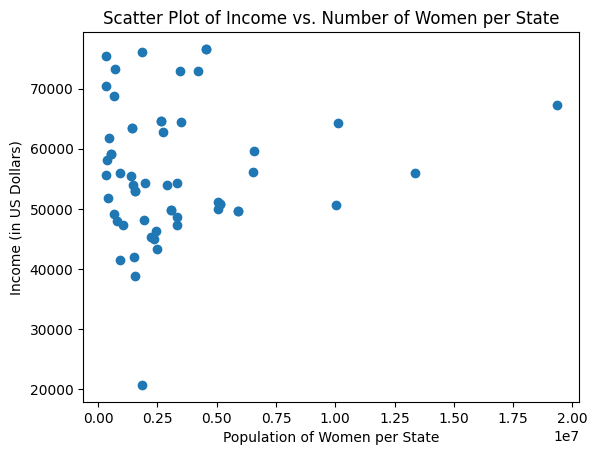

In [796]:
plt.scatter(us_census['Women'], us_census['Income'])
plt.title("Scatter Plot of Income vs. Number of Women per State")
plt.xlabel("Population of Women per State")
plt.ylabel("Income (in US Dollars)")
plt.show()
plt.close()

Print out your column with the number of women per state to see.

We can fill in those nans by using pandas’ .fillna() function.

You have the TotalPop per state, and you have the Men per state. As an estimate for the nan values in the Women column, you could use the TotalPop of that state minus the Men for that state.

In [797]:
us_census.Women

0     2489527.0
1      349215.0
2     3342840.0
3     1506295.0
4    19334329.0
5     2630239.0
0     2630239.0
1     1841615.0
2      478041.0
3      340810.0
4    10045763.0
5     5123362.0
0     5123362.0
1      696428.0
2      806083.0
3     6556862.0
4     3333382.0
5     1558931.0
0     1558931.0
1     1453125.0
2     2233145.0
3     2364097.0
4      679019.0
5           NaN
0           NaN
1     3455936.0
2     5038598.0
3     2727005.0
4     1536358.0
5     3081445.0
0     3081445.0
1           NaN
2      939759.0
3     1390901.0
4      670717.0
5     4561386.0
0     4561386.0
1     1051703.0
2    10131373.0
3     5049925.0
4      353677.0
5     5913084.0
0     5913084.0
1     1942789.0
2     1990780.0
3     6534215.0
4     1869213.0
5      543273.0
0      543273.0
1     2455167.0
2      419713.0
3     3331859.0
4    13367298.0
5     1444150.0
0     1444150.0
1      318031.0
2     4195682.0
3     3497739.0
4      937789.0
5     2890732.0
Name: Women, dtype: float64

In [798]:
us_census['Women'] = us_census.Women.fillna(us_census.TotalPop - us_census.Men)
us_census.Women

0     2489527.0
1      349215.0
2     3342840.0
3     1506295.0
4    19334329.0
5     2630239.0
0     2630239.0
1     1841615.0
2      478041.0
3      340810.0
4    10045763.0
5     5123362.0
0     5123362.0
1      696428.0
2      806083.0
3     6556862.0
4     3333382.0
5     1558931.0
0     1558931.0
1     1453125.0
2     2233145.0
3     2364097.0
4      679019.0
5     3057895.0
0     3057895.0
1     3455936.0
2     5038598.0
3     2727005.0
4     1536358.0
5     3081445.0
0     3081445.0
1      504536.0
2      939759.0
3     1390901.0
4      670717.0
5     4561386.0
0     4561386.0
1     1051703.0
2    10131373.0
3     5049925.0
4      353677.0
5     5913084.0
0     5913084.0
1     1942789.0
2     1990780.0
3     6534215.0
4     1869213.0
5      543273.0
0      543273.0
1     2455167.0
2      419713.0
3     3331859.0
4    13367298.0
5     1444150.0
0     1444150.0
1      318031.0
2     4195682.0
3     3497739.0
4      937789.0
5     2890732.0
Name: Women, dtype: float64

Use .duplicated() on your census DataFrame to see if we have duplicate rows in there

In [799]:
duplicated = us_census.duplicated(subset=['Income'])
duplicated

0    False
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
dtype: bool

Drop those duplicates using the .drop_duplicates() function.




In [800]:
us_census = us_census.drop_duplicates(subset=['Income'])

Make the scatterplot again. Now, it should be perfect! Your job is secure, for now.



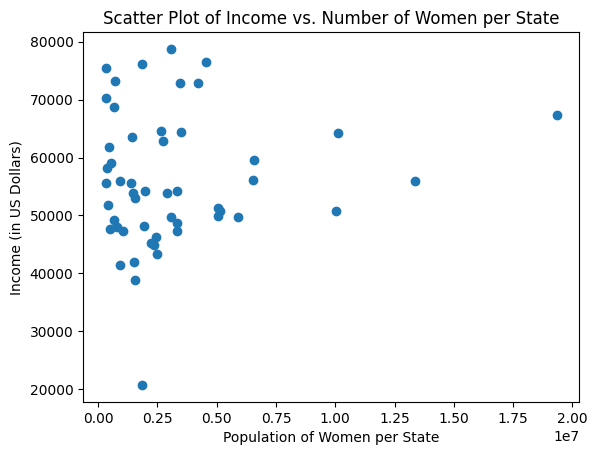

In [801]:
plt.scatter(us_census['Women'], us_census['Income'])
plt.title("Scatter Plot of Income vs. Number of Women per State")
plt.xlabel("Population of Women per State")
plt.ylabel("Income (in US Dollars)")
plt.show()
plt.close()

Now, your boss wants you to make a bunch of histograms out of the race data that you have. Look at the .columns again to see what the race categories are.

In [802]:
us_census.dtypes

Unnamed: 0      int64
State          object
TotalPop        int64
Hispanic       object
White          object
Black          object
Native         object
Asian          object
Pacific        object
Income        float64
GenderPop      object
Men             int64
Women         float64
dtype: object

You will have to get the columns into numerical format, and those percentage signs will have to go.



In [803]:
us_census['Hispanic'] = us_census.Hispanic.str.replace('%','')
us_census['White'] = us_census.White.str.replace('%','')
us_census['Black'] = us_census.Black.str.replace('%','')
us_census['Native'] = us_census.Native.str.replace('%','')
us_census['Asian'] = us_census.Asian.str.replace('%','')
us_census['Pacific'] = us_census.Pacific.str.replace('%','')

In [804]:
us_census['Hispanic'] = pd.to_numeric(us_census.Hispanic)
us_census['White'] = pd.to_numeric(us_census.White)
us_census['Black'] = pd.to_numeric(us_census.Black)
us_census['Native'] = pd.to_numeric(us_census.Native)
us_census['Asian'] = pd.to_numeric(us_census.Hispanic)
us_census['Pacific'] = pd.to_numeric(us_census.Pacific)

Replace nan values with mean for each race

In [805]:
us_census = us_census.fillna(value={'Hispanic': us_census.Hispanic.mean(), 
'White': us_census.White.mean(), 
'Black': us_census.Black.mean(), 
'Native': us_census.Native.mean(), 
'Asian': us_census.Asian.mean(), 
'Pacific': us_census.Pacific.mean()})

Plot histograms using a for loop

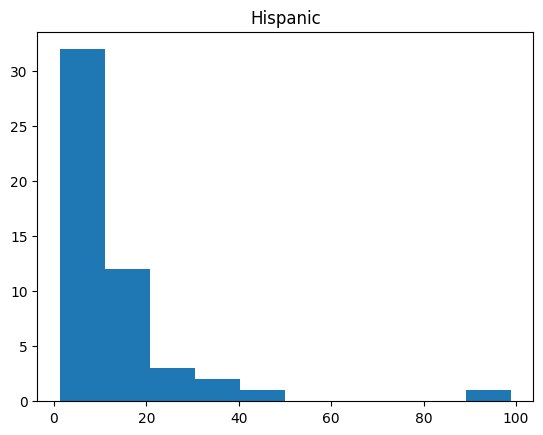

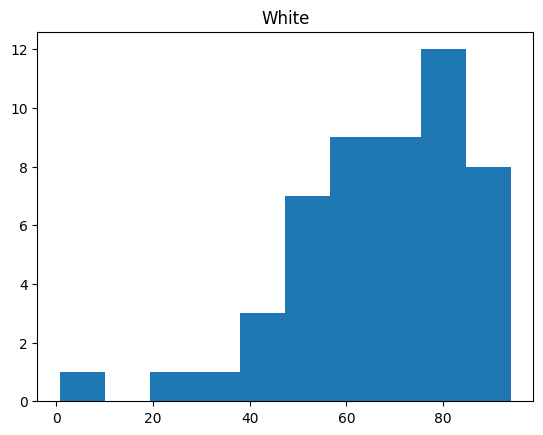

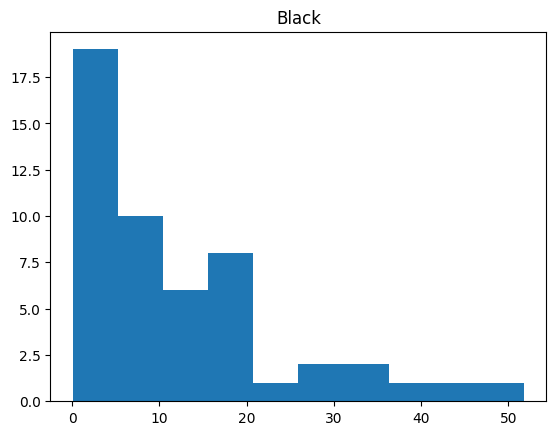

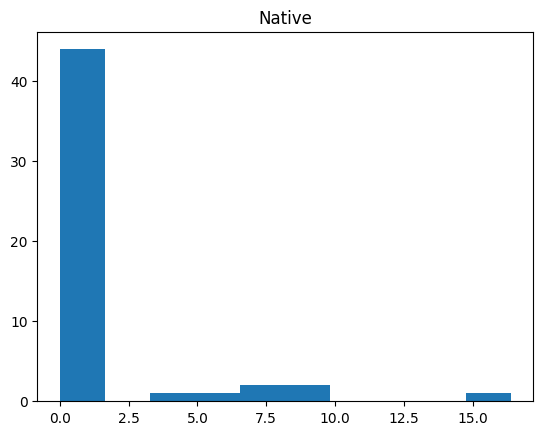

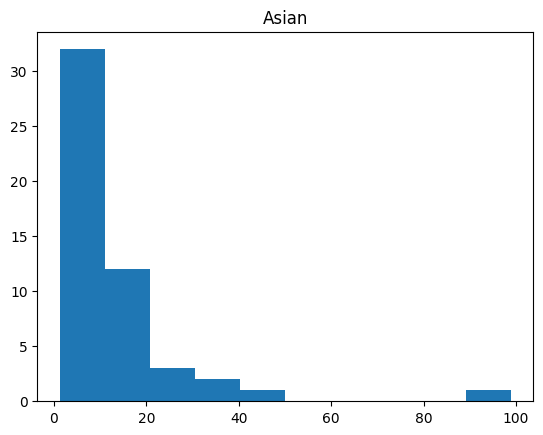

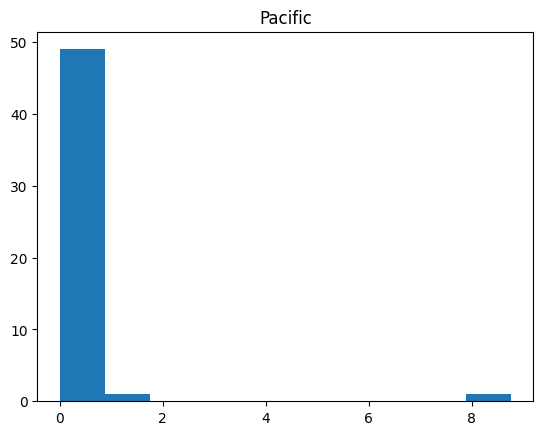

In [806]:
for race in ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']:
    plt.hist(x = race, data = us_census)
    plt.title(race)
    plt.show()
    plt.close()